# 1.1 Generating Your Own Unique Data

In [1]:
%run datasetGenerator.py --ID 1002068038

# 1.2 Fisher’s Exact Test 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.stats import fisher_exact 
#reading CSV File
d=pd.read_csv(r"C:\Users\revan\1002068038.csv")
d.head()
#declaring the dataframes as seperate lists
A=list(d['Case_Num_C_Allele'])
B=list(d['Control_Num_C_Allele'])
C=list(d['Case_Num_T_Allele'])
D=list(d['Control_Num_T_Allele'])
#defining empty lists for odds ratio and p value
pvalue=[]
odd=[]
for i in range(len(A)):
     table=np.array([[C[i],A[i]],[D[i],B[i]]])
     #finding odds ratio and p values
     o,p=fisher_exact(table,alternative="less")
     pvalue.append(p)
     odd.append(o)
df = pd.read_csv("C:/Users/revan/1002068038.csv")
df["odds_Ratio"] = odd
df["p_Values"]=pvalue
#appending odds ratio and p values to the exisiting csv file form given path
df.to_csv("C:/Users/revan/1002068038.csv", index=False)
p=0
q=0
for i in odd:
    if i>1:
        #print(i)
        p+=1
    elif i<1:
        q+=1
print("allele ratio is  {}:{}".format(p,q))


allele ratio is  481:511


In [16]:
Effective_P=5*math.pow(10,-8)
c=1
v=[]
for i in pvalue:
    if(i<Effective_P):
        v.append('SNP'+str(c))
    c+=1
print("No.of SNP's that are significant under effective p value are:{}".format(len(v)))
#SNP's that are significant under effective p value
print(v)


No.of SNP's that are significant under effective p value are:159
['SNP7', 'SNP12', 'SNP13', 'SNP19', 'SNP21', 'SNP27', 'SNP28', 'SNP31', 'SNP35', 'SNP37', 'SNP43', 'SNP60', 'SNP62', 'SNP63', 'SNP68', 'SNP73', 'SNP77', 'SNP80', 'SNP86', 'SNP90', 'SNP95', 'SNP96', 'SNP98', 'SNP100', 'SNP108', 'SNP114', 'SNP120', 'SNP126', 'SNP128', 'SNP147', 'SNP161', 'SNP173', 'SNP178', 'SNP200', 'SNP201', 'SNP205', 'SNP207', 'SNP209', 'SNP230', 'SNP232', 'SNP236', 'SNP240', 'SNP248', 'SNP261', 'SNP264', 'SNP268', 'SNP270', 'SNP273', 'SNP277', 'SNP280', 'SNP285', 'SNP287', 'SNP299', 'SNP300', 'SNP301', 'SNP302', 'SNP307', 'SNP314', 'SNP324', 'SNP331', 'SNP344', 'SNP345', 'SNP366', 'SNP368', 'SNP381', 'SNP384', 'SNP390', 'SNP406', 'SNP409', 'SNP434', 'SNP437', 'SNP445', 'SNP447', 'SNP466', 'SNP467', 'SNP470', 'SNP476', 'SNP479', 'SNP480', 'SNP486', 'SNP493', 'SNP502', 'SNP523', 'SNP526', 'SNP532', 'SNP539', 'SNP540', 'SNP542', 'SNP553', 'SNP558', 'SNP559', 'SNP582', 'SNP607', 'SNP614', 'SNP620', 'SNP631'

In [17]:
df

,SNP,Case_Num_C_Allele,Case_Num_T_Allele,Control_Num_C_Allele,Control_Num_T_Allele,odds_Ratio,p_Values,minuslog10pvalue
0,0,24,26,85,15,6.138889,9.999995e-01,2.013134e-07
1,1,17,33,18,82,0.426112,2.532060e-02,1.596526e+00
2,2,11,39,78,22,12.570248,1.000000e+00,1.426964e-12
3,3,22,28,41,59,0.884438,4.292172e-01,3.673228e-01
4,4,23,27,97,3,37.956522,1.000000e+00,3.568012e-15
...,...,...,...,...,...,...,...,...
995,995,34,16,27,73,0.174053,1.653439e-06,5.781612e+00
996,996,1,49,47,53,43.452830,1.000000e+00,8.454837e-12
997,997,18,32,20,80,0.444444,2.846233e-02,1.545730e+00
998,998,41,9,26,74,0.077126,4.763493e-11,1.032207e+01


In [18]:
pValues = df['p_Values']
SNP=df['SNP']
result_pvalues = pd.DataFrame(SNP)



In [19]:
result_pvalues

,SNP
0,0
1,1
2,2
3,3
4,4
...,...
995,995
996,996
997,997
998,998


# 1.3 Corrected P-Values

In [20]:
j=[]
t=[]
b=[]
Effective_P=5*math.pow(10,-8)
corrected_p=5*math.pow(10,-8)/1000
#print(len(list(d['SNP'])))
c=1
for i in pvalue:
    if(i<corrected_p):
        b.append('SNP'+str(c))
    c+=1
print("No.of SNPs significant under corrected ThreeShold  are:{}".format(len(b)))
#d["CorrectedThreeShold"]=b



No.of SNPs significant under corrected ThreeShold  are:108


In [21]:
j.append(-math.log10(Effective_P))
t.append(-math.log10(corrected_p))
print(b)
r=0
v=[]
j=j*1000

for i in pvalue:
    v.append(-math.log10(i))


['SNP7', 'SNP12', 'SNP13', 'SNP19', 'SNP21', 'SNP27', 'SNP28', 'SNP37', 'SNP43', 'SNP60', 'SNP63', 'SNP68', 'SNP73', 'SNP90', 'SNP95', 'SNP114', 'SNP120', 'SNP128', 'SNP161', 'SNP173', 'SNP178', 'SNP200', 'SNP201', 'SNP205', 'SNP207', 'SNP209', 'SNP232', 'SNP236', 'SNP240', 'SNP248', 'SNP261', 'SNP268', 'SNP273', 'SNP277', 'SNP280', 'SNP287', 'SNP299', 'SNP300', 'SNP301', 'SNP307', 'SNP314', 'SNP331', 'SNP344', 'SNP345', 'SNP368', 'SNP381', 'SNP384', 'SNP406', 'SNP437', 'SNP445', 'SNP447', 'SNP466', 'SNP467', 'SNP470', 'SNP476', 'SNP479', 'SNP480', 'SNP486', 'SNP493', 'SNP502', 'SNP526', 'SNP539', 'SNP540', 'SNP542', 'SNP558', 'SNP559', 'SNP582', 'SNP607', 'SNP614', 'SNP620', 'SNP631', 'SNP635', 'SNP637', 'SNP643', 'SNP648', 'SNP685', 'SNP686', 'SNP691', 'SNP704', 'SNP729', 'SNP745', 'SNP749', 'SNP755', 'SNP774', 'SNP783', 'SNP797', 'SNP800', 'SNP803', 'SNP809', 'SNP810', 'SNP821', 'SNP826', 'SNP859', 'SNP860', 'SNP874', 'SNP876', 'SNP885', 'SNP895', 'SNP908', 'SNP909', 'SNP910', 'SNP9

In [22]:
result_pvalues=result_pvalues.assign(pValues = df['p_Values'])
result_pvalues = result_pvalues.assign(significant= df['p_Values']<Effective_P)
result_pvalues = result_pvalues.assign(significant_corrected_pvalue= df['p_Values']<corrected_p)
print(corrected_p)

4.9999999999999995e-11


In [23]:
result_pvalues['significant'].value_counts() [True]

159

In [24]:
result_pvalues.to_csv("C:/Users/revan/result.csv", index=False)

In [25]:
result_pvalues

,SNP,pValues,significant,significant_corrected_pvalue
0,0,9.999995e-01,False,False
1,1,2.532060e-02,False,False
2,2,1.000000e+00,False,False
3,3,4.292172e-01,False,False
4,4,1.000000e+00,False,False
...,...,...,...,...
995,995,1.653439e-06,False,False
996,996,1.000000e+00,False,False
997,997,2.846233e-02,False,False
998,998,4.763493e-11,True,True


In [26]:
result_pvalues['significant_corrected_pvalue'].value_counts() [True]

108

In [27]:
result_pvalues.to_csv("C:/Users/revan/result.csv", index=False)

# 1.4 Manhattan Plots

Text(0.5, 0, 'SNP Locus')

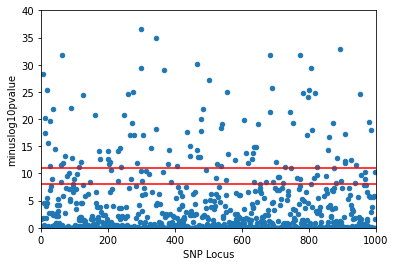

In [28]:
# https://stackoverflow.com/questions/37463184/how-to-create-a-manhattan-plot-with-matplotlib-in-python
from pandas import DataFrame
from scipy.stats import uniform
from scipy.stats import randint
import numpy as np
import matplotlib.pyplot as plt


df['minuslog10pvalue'] = -np.log10(df.p_Values)

df['SNP'] = range(len(df))
df_grouped = df.groupby(('SNP'))

fig = plt.figure()
ax = fig.add_subplot(111)
for num, (name, group) in enumerate(df_grouped):
    group.plot(kind='scatter', x='SNP', y='minuslog10pvalue', ax=ax)
    
plt.axhline(y = 8, color = 'r', label = "red line")
plt.axhline(y = 11, color = 'r', label = "red line")
ax.set_xlim([0, len(df.p_Values)])
ax.set_ylim([0, 40])
ax.set_xlabel('SNP Locus')